# Tujuan
Tahap awal sebelum membangun sebuah model machine learning adalah mendefinisikan problem statement yang ingin kita selesaikan. Pada tahap ini kita menentukan apa masalah yang ingin diselesaikan dan bagaimana implementasi dari model jaringan saraf tiruan dapat menyelesaikan masalah tersebut. Setelah kita memahami masalah, kita dapat mengembangkan model jaringan saraf tiruan sebagai sebuah solusi.

Pada latihan kali ini kita akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan

#Tahapan Latihan

Tentunya machine learning selalu membutuhkan data. Pada tahap awal kita perlu memahami dataset yang kita miliki terlebih dahulu. Beberapa hal yang perlu diketahui adalah format dari data, jumlah sampel, dan berapa jumlah label. Selain itu, kita juga perlu memastikan apakah dataset tersebut merupakan data kontinu (masalah regresi) atau data diskrit (masalah klasifikasi).

Dataset yang kita gunakan memiliki 192 sampel data latih yang terdiri dari 96 sampel gambar ruangan rapi dan 96 sampel gambar ruangan berantakan.

Tahapan latihan kali ini adalah:

1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0.
2. Mengunduh dataset dan melakukan extract file dengan metode unzip.
3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
4. Pre-processing data dengan image augmentation.
5. Mempersiapkan data latih yang akan dipelajari oleh model.
6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

## 1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


##2. Mengunduh dataset dan melakukan extract file dengan metode unzip.

In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-02-26 15:17:43--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  16.2MB/s    in 5.0s    

2023-02-26 15:17:50 (13.5 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



Kode di bawah ini berfungsi untuk mengekstrak data yang sebelumnya kita unduh. Lalu kita mendefinisikan nama direktori untuk data latih dan data validasi.

##3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

direktori data latih dan data validasi masing-masing memiliki sub-direktori clean dan messy. Setiap sub-direktori menyimpan gambar yang sesuai dengan nama sub-direktori tersebut. Jadi, pada sub-direktori ‘clean’ terdapat gambar-gambar ruangan yang rapi dan pada sub-direktori ‘messy’ terdapat gambar-gambar ruangan yang berantakan.

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

##3. Pre-processing data dengan image augmentation.

Langkah selanjutnya, kita akan menerapkan ImageDataGenerator untuk data latih dan data validasi. ImageDataGenerator merupakan sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data validasi. Beberapa kemudahan yang disediakan ImageDataGenerator antara lain, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu. Anda akan mempelajari lebih dalam terkait teknik ini pada kelas “Belajar Pengembangan Machine Learning”. Anda juga dapat melihat detail mengenai augmentasi gambar menggunakan ImageDataGenerator pada tautan berikut. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

##5. Mempersiapkan data latih yang akan dipelajari oleh model.

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


##6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
pada model CNN, proses klasifikasi gambar hanya berfokus pada atribut-atribut unik yang membedakan tiap kategori. Sehingga, teknik ini dinilai lebih optimal dibandingkan hanya menggunakan model MLP yang membedakan tiap kategori dengan melihat keseluruhan piksel-piksel pada gambar.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Usai membuat model, kita bisa menggunakan fungsi summary() untuk melihat summary dari arsitektur model yang telah kita buat.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

##7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.

Setelah membuat arsitektur model CNN, tahap selanjutnya adalah melakukan compile model tersebut menggunakan fungsi compile(). Pada tahap ini, kita juga menentukan loss function serta optimizer yang akan digunakan. Loss function yang digunakan pada kasus klasifikasi biner adalah "binary_crossentropy". Selain itu, optimizer yang digunakan  pada kasus ini adalah "Adam optimizer". Adam optimizer dipilih karena mudah diterapkan, lebih efisien secara komputasi dan kebutuhan memori yang lebih kecil.

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Hal yang harus didefinisikan pada tahap ini adalah loss function dan optimizer. Kemudian, kita mulai proses pelatihan model dengan memanggil fungsi fit(). 

Dengan menggunakan ImageDataGenerator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli gambar sesuai dengan direktorinya. Sebagai contoh,  sebuah gambar yang terdapat di direktori clean, akan diberi label “clean” oleh ImageDataGenerator secara otomatis.

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 17s - loss: 1.0994 - accuracy: 0.5200 - val_loss: 0.6923 - val_accuracy: 0.5000 - 17s/epoch - 685ms/step
Epoch 2/20
25/25 - 15s - loss: 0.6931 - accuracy: 0.5300 - val_loss: 0.6889 - val_accuracy: 0.5000 - 15s/epoch - 602ms/step
Epoch 3/20
25/25 - 14s - loss: 0.6842 - accuracy: 0.5700 - val_loss: 0.6827 - val_accuracy: 0.5000 - 14s/epoch - 571ms/step
Epoch 4/20
25/25 - 16s - loss: 0.6743 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5000 - 16s/epoch - 634ms/step
Epoch 5/20
25/25 - 15s - loss: 0.6696 - accuracy: 0.5400 - val_loss: 0.6063 - val_accuracy: 0.6000 - 15s/epoch - 591ms/step
Epoch 6/20
25/25 - 15s - loss: 0.6880 - accuracy: 0.6400 - val_loss: 0.6090 - val_accuracy: 0.7000 - 15s/epoch - 585ms/step
Epoch 7/20
25/25 - 15s - loss: 0.7273 - accuracy: 0.5900 - val_loss: 0.6576 - val_accuracy: 0.8500 - 15s/epoch - 618ms/step
Epoch 8/20
25/25 - 16s - loss: 0.6491 - accuracy: 0.7100 - val_loss: 0.7650 - val_accuracy: 0.5000 - 16s/epoch - 632ms/step
Epoch 9/

##8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

Anda dapat mencari dan mengunduh gambar tersebut dari mesin pencari Google. Atau, Anda dapat menggunakan gambar dari [tautan](https://drive.google.com/drive/folders/1EXJCTvRHqsLVKJEws-yBnAf2FR8m_jNI?usp=sharing) berikut.

Saving e83dcfda80cf389a9f8e181519b0f7bf.jpg to e83dcfda80cf389a9f8e181519b0f7bf.jpg
1/1 [==============================] - 0s 487ms/step
e83dcfda80cf389a9f8e181519b0f7bf.jpg
clean


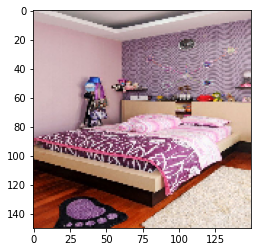

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')